In [328]:
# library
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [329]:
# Read data
employee_satisfaction_data = pd.read_csv('data.csv')
employee_satisfaction_data.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [330]:
employee_satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [331]:
employee_satisfaction_data = employee_satisfaction_data.drop('Unnamed: 0', axis = 1)
employee_satisfaction_data = employee_satisfaction_data.drop('location', axis = 1)
employee_satisfaction_data = employee_satisfaction_data.drop('emp_id', axis = 1)

In [332]:
vectorizer = CountVectorizer()
#Transform department data
deptColumnData = employee_satisfaction_data['Dept']
deptColumnData_encoded = vectorizer.fit_transform(deptColumnData)
deptColumnData_encoded = deptColumnData_encoded.toarray()
deptColumnData_encoded = [row[0] for row in deptColumnData_encoded]
#Transfortm location
recruitmentData = employee_satisfaction_data['recruitment_type']
recruitmentData_encoded = vectorizer.fit_transform(recruitmentData)
recruitmentData_encoded = recruitmentData_encoded.toarray()
recruitmentData_encoded = [row[0] for row in recruitmentData_encoded]
#Transfortm education
educationData = employee_satisfaction_data['education']
educationData_encoded = vectorizer.fit_transform(educationData)
educationData_encoded = educationData_encoded.toarray()
educationData_encoded = [row[0] for row in educationData_encoded]

employee_satisfaction_data = employee_satisfaction_data.assign(Dept = deptColumnData_encoded)
employee_satisfaction_data = employee_satisfaction_data.assign(recruitment_type = recruitmentData_encoded)
employee_satisfaction_data = employee_satisfaction_data.assign(education = educationData_encoded)
print(employee_satisfaction_data)

     age  Dept  education  recruitment_type  job_level  rating  onsite  \
0     28     1          1                 0          5       2       0   
1     50     0          1                 0          3       5       1   
2     43     0          0                 0          4       1       0   
3     44     0          1                 0          2       3       1   
4     33     1          0                 1          2       1       0   
..   ...   ...        ...               ...        ...     ...     ...   
495   49     1          1                 0          2       5       0   
496   24     0          0                 0          2       4       0   
497   34     0          1                 0          1       3       0   
498   26     0          0                 0          2       1       1   
499   26     0          0                 1          3       4       0   

     awards  certifications  salary  satisfied  
0         1               0   86750          1  
1         2  

<AxesSubplot:>

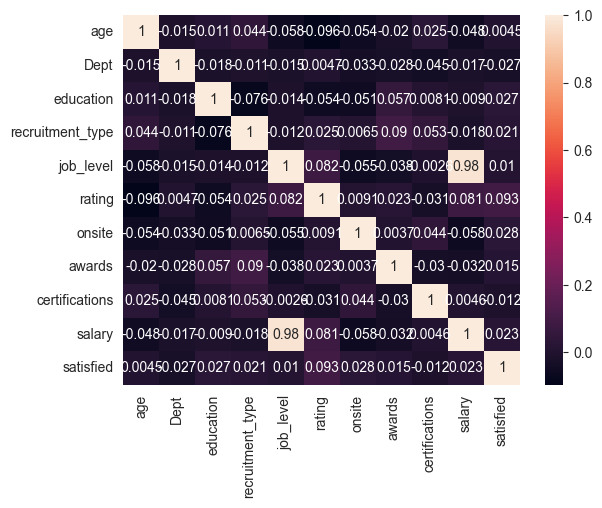

In [333]:
sns.heatmap(employee_satisfaction_data.corr(), annot=True)

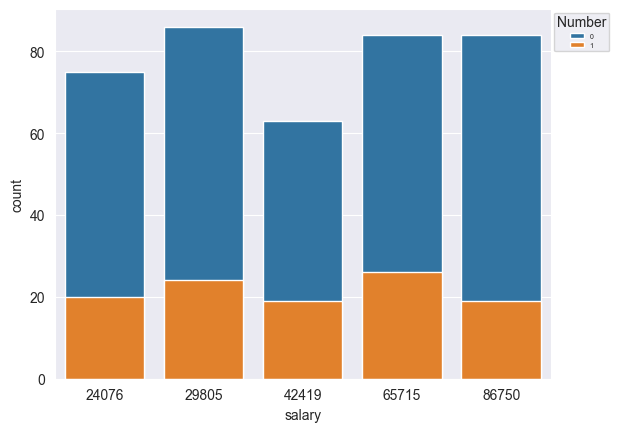

In [334]:
sns.countplot(x="salary", hue="recruitment_type", data=employee_satisfaction_data, dodge=False)
plt.legend(title = 'Number', bbox_to_anchor = (1, 1), fontsize=5)

<AxesSubplot:xlabel='salary', ylabel='job_level'>

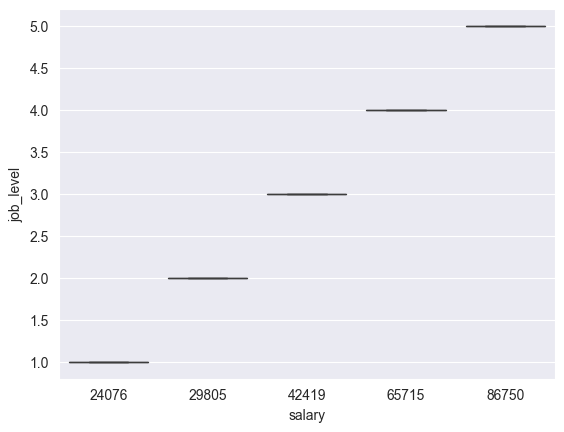

In [335]:
sns.boxplot(x="salary", y="job_level", data=employee_satisfaction_data, linewidth = 1, fliersize = 1)

In [336]:
scaler = preprocessing.MinMaxScaler()
names = employee_satisfaction_data.columns
d = scaler.fit_transform(employee_satisfaction_data)
scaled_dataset = pd.DataFrame(d, columns=names)
#Split
X = employee_satisfaction_data.drop('recruitment_type', axis=1);
y = employee_satisfaction_data['recruitment_type'];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77777)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        74
           1       0.57      0.15      0.24        26

    accuracy                           0.75       100
   macro avg       0.67      0.56      0.55       100
weighted avg       0.71      0.75      0.69       100

[[71  3]
 [22  4]]


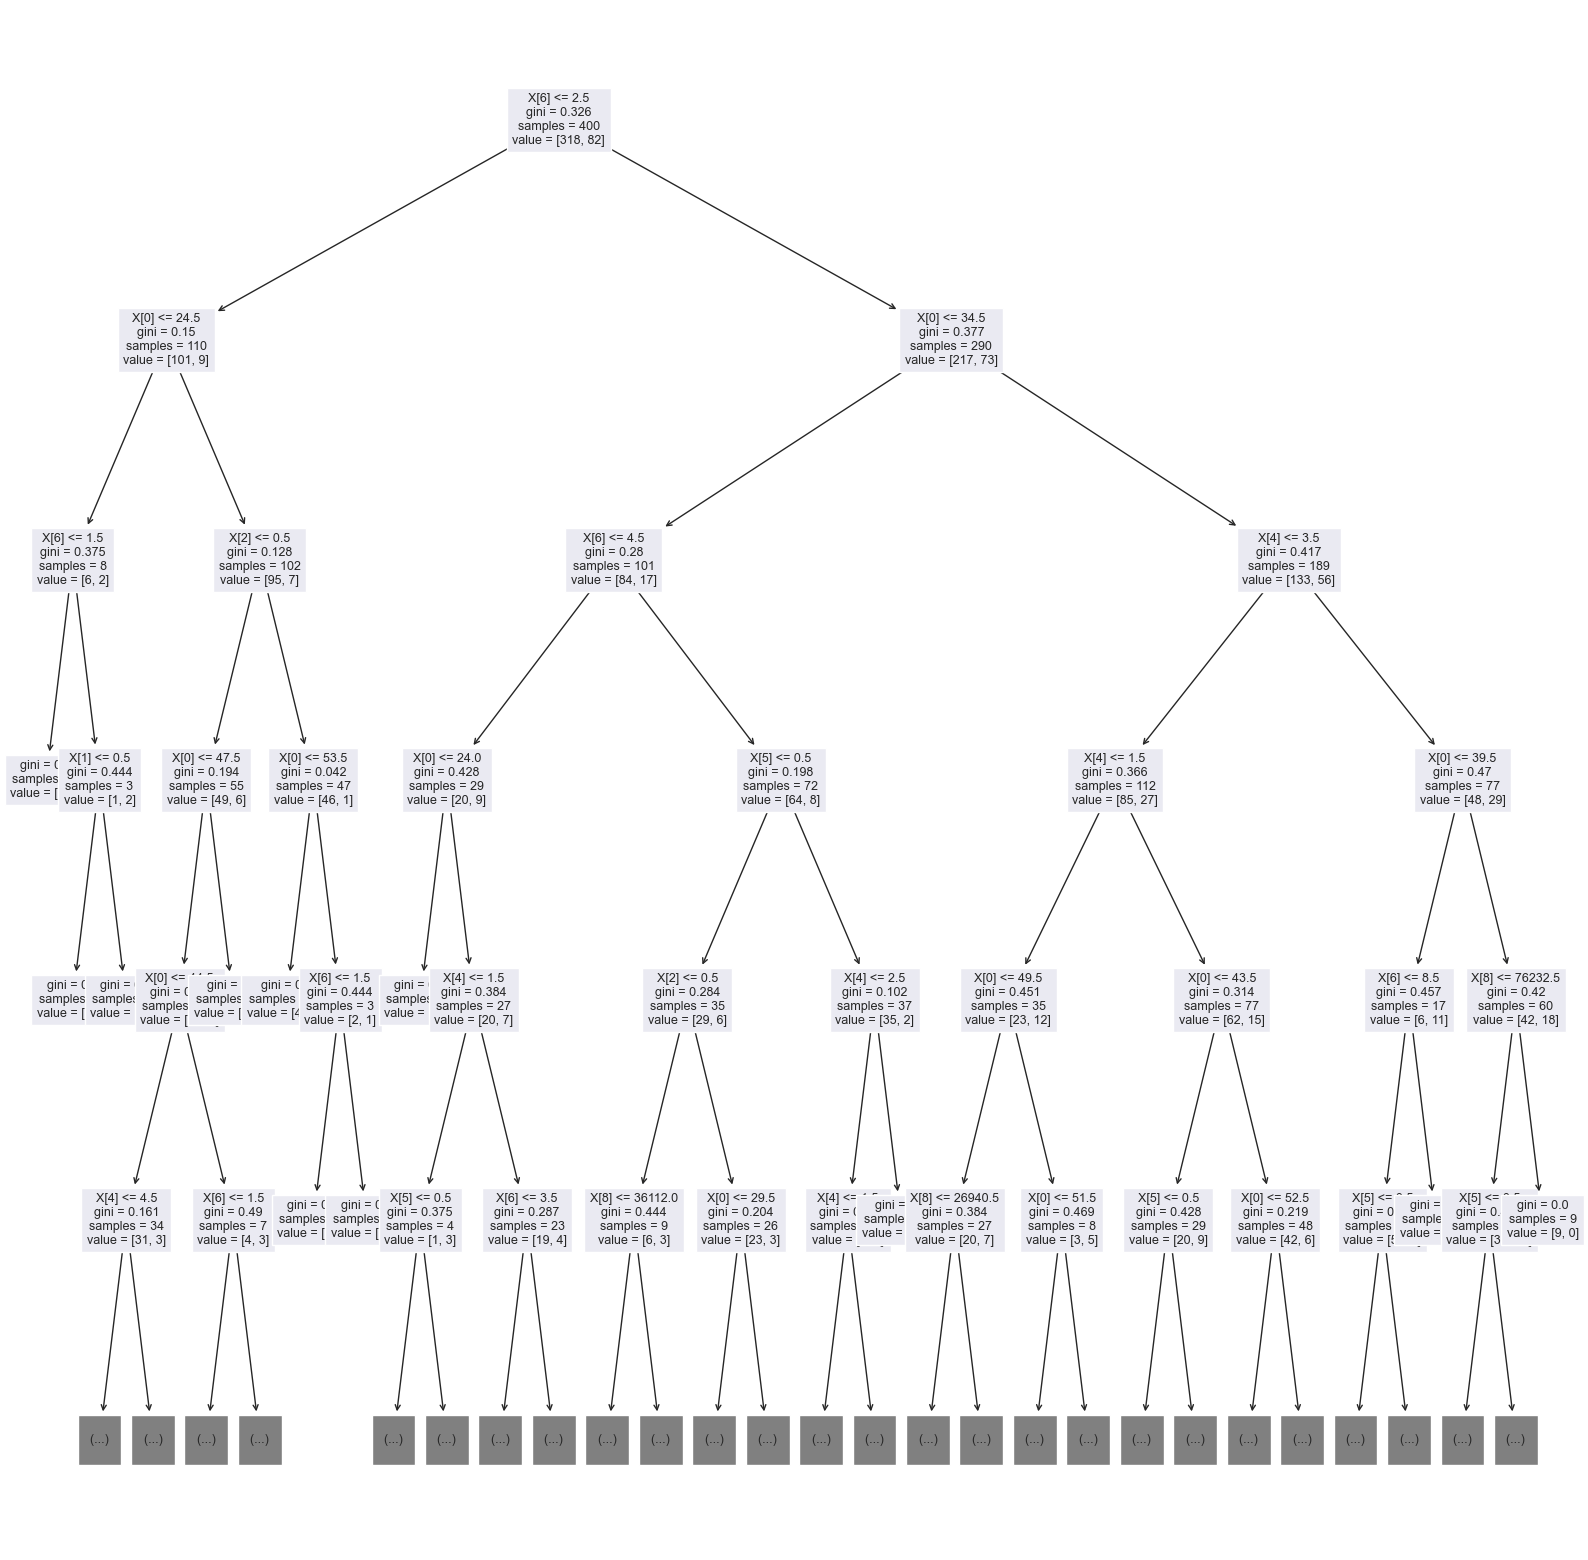

In [337]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)
plt.figure(figsize=(20,20))
plot_tree(decision_tree, max_depth=5, fontsize=9)
plt.show()

In [338]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
prediction = randomForest.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        74
           1       1.00      0.08      0.14        26

    accuracy                           0.76       100
   macro avg       0.88      0.54      0.50       100
weighted avg       0.82      0.76      0.67       100

[[74  0]
 [24  2]]


In [339]:
svm = svm.SVC()
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100

[[74  0]
 [26  0]]


c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [340]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
prediction = adaboost.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100

[[74  0]
 [26  0]]


c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vladislavzelenin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 